# Глава 5 - Математика

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
num_friends = [20, 30, 40, 100, 12, 22, 33, 41, 18, 9, 6, 9, 9, 12, 4, 7, 6, 15, 15, 15, 20, 7, 3]

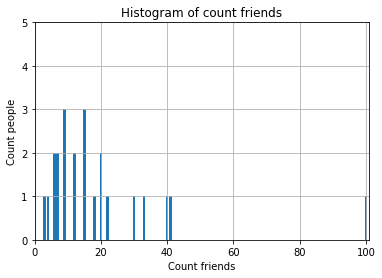

In [11]:
friend_counts = Counter(num_friends)
#print(friend_counts)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 5])
plt.title('Histogram of count friends')
plt.xlabel('Count friends')
plt.ylabel('Count people')
plt.grid()
plt.show()

In [12]:
num_points = len(num_friends)
num_points

23

In [14]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
largest_value, smallest_value

(100, 3)

In [15]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smalles_value = sorted_values[1]
second_largest_value = sorted_values[-2]

## Показатели центра распределения

In [32]:
def mean_new(x):
    return sum(x) / len(x)

print(mean_new(num_friends))

19.695652173913043


In [21]:
def median_new(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
print(median_new(num_friends))

15


In [24]:
# квантиль
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

q = [0.1, 0.25, 0.75, 0.9]
print([quantile(num_friends, x) for x in q])

[6, 7, 22, 40]


In [26]:
# мода
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))

[9, 15]


## Показатели вариации

In [27]:
# размах
def data_range(x):
    return max(x) - min(x)
print(data_range(num_friends))

97


In [33]:
# скалярное произведение векторов
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

# сумма квадратов вектора
def sum_of_squares(v):
    ''' v_1 * v_1 + ... + v_n * v_n'''
    return dot(v, v)

# вектор отклонений от среднего (центрировать вектор)
def de_mean(x):
    x_bar = mean_new(x)
    return [x_i - x_bar for x_i in x]

# дисперсия - средняя сумма квадратов отклонений от среднего
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print(variance(num_friends))

425.31225296442676


In [34]:
# стандартное отклонение
def standart_deviation(x):
    return variance(x) ** 0.5

print(standart_deviation(num_friends))

20.623099984348297


In [35]:
# интерквартильный размах
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print(interquartile_range(num_friends))

15


## Корреляция

In [86]:
import random
daily_minutes = [x // 0.2 * random.randint(1, 100) for x in num_friends]
# ковариация
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

print(covariance(num_friends, daily_minutes))

26263.988142292492


In [87]:
# корреляция
def correlation(x, y):
    stdev_x = standart_deviation(x)
    stdev_y = standart_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
    
print(correlation(num_friends, daily_minutes))

0.4184945753070152


In [88]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(num_friends) if i != outlier]

print(correlation(num_friends_good, daily_minutes_good))

1.0000000000000002
